# Explore Statistics by Data Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We will use a small dataset that contains (Physics,Biology and Maths) marks of a classroom of students.

Read the comma-seperated file(csv) that contains the marks. We assign the "Names" column as our index

In [2]:
df = pd.read_csv("data/grades.csv",index_col=0)

Show the first 5 rows of data.

In [3]:
df.head()

,Physics,Biology,Maths
Name,,,
Arnold,80,78,70
Bob,60,98,45
Cassandra,34,56,65
Donovan,56,65,32
Emily,98,23,55


Show all the data entries.

In [4]:
df

,Physics,Biology,Maths
Name,,,
Arnold,80,78,70
Bob,60,98,45
Cassandra,34,56,65
Donovan,56,65,32
Emily,98,23,55
Fabian,45,44,60
Grom,12,66,80
Hilary,60,88,78
Ivan,45,97,99


Show only the data column that you want.

In [5]:
df["Biology"].head()

Name
Arnold       78
Bob          98
Cassandra    56
Donovan      65
Emily        23
Name: Biology, dtype: int64

Describe the dataset with mean, standard deviation, data entries count and etc.

In [6]:
df.describe()

,Physics,Biology,Maths
count,26.000000,26.000000,26.000000
mean,63.769231,67.038462,69.769231
std,22.742573,21.371908,17.339683
min,12.000000,20.000000,32.000000
25%,46.250000,56.000000,60.000000
50%,63.000000,66.000000,68.500000
75%,79.500000,78.000000,83.500000
max,98.000000,98.000000,99.000000


Show the information about you data frame, e.g. Columns, Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Arnold to Zayn
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Physics  26 non-null     int64
 1   Biology  26 non-null     int64
 2   Maths    26 non-null     int64
dtypes: int64(3)
memory usage: 832.0+ bytes


Show available columns of data.

In [8]:
df.columns.values

array(['Physics', 'Biology', 'Maths'], dtype=object)

Plot a **bar chart** of the grades data.

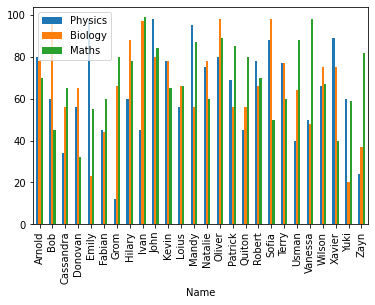

In [9]:
df.plot(kind="bar")

Plot a **box plot** of the grades data.

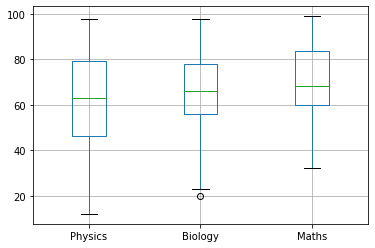

In [10]:
df.boxplot()

Plot the **histograms** of the grades data.

/home/william/miniconda3/envs/main/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/william/miniconda3/envs/main/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/william/miniconda3/envs/main/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b293162b0>,
      dtype=object)

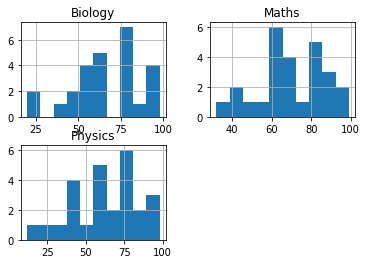

In [11]:
df.hist()

Plot only the histogram of "Physics" column.

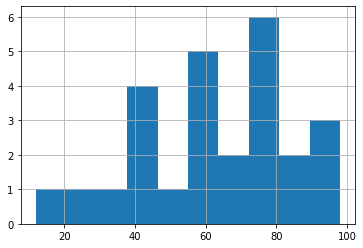

In [12]:
df["Physics"].hist()

We can plot a distribution plot by using **seaborn** module.

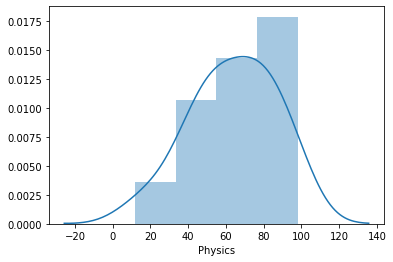

In [13]:
sns.distplot(df["Physics"])

We can check how "normally distributed" a distribution is by checking the skewness of the distribution.
- A skewness value of 0 indicates a symmetrical distribution of values.
- A negative skewness value indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution(Left skewed).
- A positive skewness value indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution(Right skewed)

Check the skewness of all columns or only 1 column.

In [14]:
df.skew()

Physics   -0.389855
Biology   -0.478819
Maths     -0.282902
dtype: float64

In [15]:
df["Physics"].skew()

-0.3898546715641385

# Data Transformation

In many Machine Learning modeling scenarios, **normality** of the features in a dataset is desirable. Power transforms are a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a **Gaussian distribution** as possible in order to stabilize variance and **minimize skewness**.

In [16]:
from sklearn.preprocessing import PowerTransformer

In [17]:
transformer = PowerTransformer(method='box-cox', standardize=False)

In [18]:
df["Physics"].shape

(26,)

The Transformer accepts 2d array, we will first transform the shape of data with reshape().

In [19]:
data_2d=df["Physics"].values.reshape(-1,1)
data_2d.shape

(26, 1)

Transform the data and check the values.

In [20]:
data_trans=transformer.fit_transform(data_2d)

In [21]:
df_new=pd.DataFrame(data_trans,index=df.index)
df_new.head()

,0
Name,
Arnold,182.021329
Bob,127.269458
Cassandra,62.621506
Donovan,116.790676
Emily,234.202382


Plot the histogram of the transformed "Physics" marks and visualize the distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b29123ac8>]],
      dtype=object)

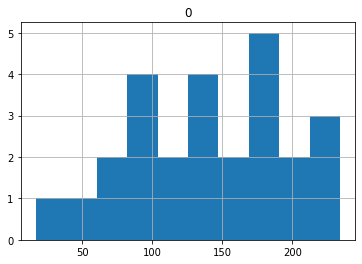

In [22]:
df_new.hist()

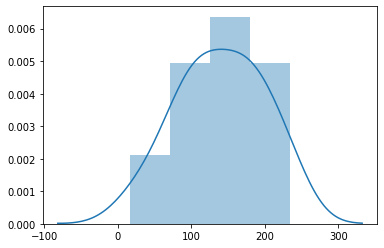

In [23]:
splot=sns.distplot(df_new)

The plotted distribution graph looks a like a **normal distribution**, but due to the dataset, the transformation is not very obvious.

We will compare the **skewness** to assert that the data transformation has made the distribution more "normally distributed".

In [24]:
print("Skewness before: {}".format(df["Physics"].skew()))
print("Skewness after: {}".format(df_new.skew().squeeze()))

Skewness before: -0.3898546715641385
Skewness after: -0.18222964775968498


Now, let us try with our own generated distribution. We will generate a distribution that is **greatly skewed**.

In [25]:
from scipy.stats import skewnorm

In [26]:
rand_vars = skewnorm.rvs(5, size=10000)

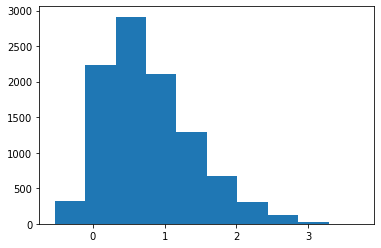

In [27]:
fig, ax = plt.subplots(1, 1)
ax.hist(rand_vars)
plt.show()

In [28]:
df=pd.DataFrame(rand_vars)

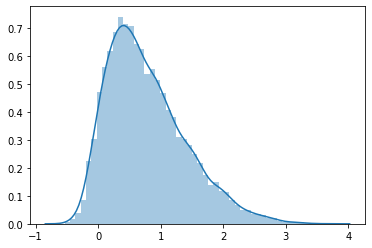

In [29]:
sns.distplot(df)

As you can see, we have 10000 random variables are the distribution is non-normal distribution and greatly skewed.

Let us check the skewness of our generated data.

In [30]:
df.skew().squeeze()

0.8298128055399475

Our dataset is positive skewed.

This round, we will use **Log Transform** to transform our data and observe the results.

In [31]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)

In [32]:
data_trans=transformer.transform(df)

In [33]:
df_new=pd.DataFrame(data_trans)

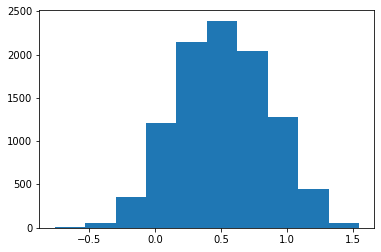

In [34]:
fig, ax = plt.subplots(1, 1)
ax.hist(data_trans)
plt.show()

In [35]:
print("Skewness before: {}".format(df.skew().squeeze()))
print("Skewness after: {}".format(df_new.skew().squeeze()))

Skewness before: 0.8298128055399475
Skewness after: 0.0040391190622052564


As you can the skewness is greatly reduced and the distribution resembles a **normal distribution**.

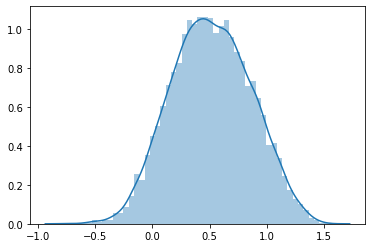

In [36]:
sns.distplot(df_new)